# Coding Block 1 - Classification Report, AUROC, AUPRC

### Load the packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import roc_auc_score, average_precision_score
import matplotlib.pyplot as plt
import xgboost as xgb

'''
...
'''

'\n...\n'

### Read the dataset 

In [2]:
diab_cleaned=pd.read_csv('diabetes_cleaned.csv')
diab_cleaned.drop(columns=['outlier_z_score', 'outlier_Tukey'],
                   errors='ignore', inplace=True)

### Rerun one of your last successful predictive models

In [3]:
def create_model(data, model_type="xgboost"):
    """
    Create and train ML models on the given dataset
    
    Parameters:
    -----------
    data : DataFrame
        The dataset containing features and target variable
    model_type : str
        The type of model to create (default: "xgboost")
        
    Returns:
    --------
    dict
        Dictionary containing the trained model, X and y data, and train/test splits
    """
    # Separate features and target
    X = data.drop('Outcome', axis=1)
    y = data['Outcome']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train model based on type
    if model_type == "random_forest":
        from sklearn.ensemble import RandomForestClassifier
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)
    elif model_type == "xgboost":
        import xgboost as xgb
        model = xgb.XGBClassifier(random_state=42)
        model.fit(X_train, y_train)
    else:
        raise ValueError(f"Unsupported model type: {model_type}")
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_type.title()} Model Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Return model and data
    return {
        "model": model,
        "X": X,
        "y": y,
        "X_train": X_train,
        "X_test": X_test,
        "y_train": y_train,
        "y_test": y_test
    }

### Produce the classification report for the model
function "classification_report" from scikit-learn package

In [7]:
# Train the model and get results
model_results = create_model(diab_cleaned, model_type="xgboost")
X_test = model_results["X_test"]
y_test = model_results["y_test"]
model = model_results["model"]

Xgboost Model Accuracy: 0.7468
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        99
           1       0.63      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



### Plot a ROC curve and a Precision-Recall-Curve for the model

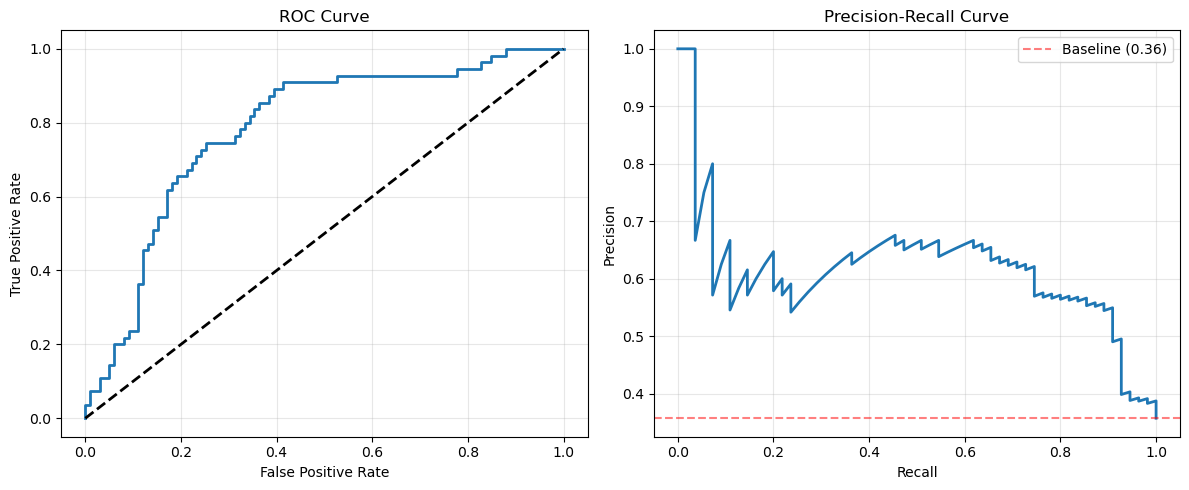

In [5]:
# Get prediction probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Create figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
ax[0].plot(fpr, tpr, lw=2)
ax[0].plot([0, 1], [0, 1], 'k--', lw=2)
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('ROC Curve')
ax[0].grid(alpha=0.3)

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
ax[1].plot(recall, precision, lw=2)
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].set_title('Precision-Recall Curve')
ax[1].grid(alpha=0.3)

# Add baseline to PR curve (class distribution)
baseline = sum(y_test) / len(y_test)
ax[1].axhline(y=baseline, color='r', linestyle='--', alpha=0.5, label=f'Baseline ({baseline:.2f})')
ax[1].legend()

plt.tight_layout()
plt.show()

### Determine the AUROC and AUPRC metrics

In [6]:
# Calculate Area Under the ROC Curve (AUROC)
auroc = roc_auc_score(y_test, y_pred_proba)
print(f"Area Under the ROC Curve (AUROC): {auroc:.4f}")

# Calculate Area Under the Precision-Recall Curve (AUPRC)
auprc = average_precision_score(y_test, y_pred_proba)
print(f"Area Under the Precision-Recall Curve (AUPRC): {auprc:.4f}")

Area Under the ROC Curve (AUROC): 0.7829
Area Under the Precision-Recall Curve (AUPRC): 0.6215
